## Topic Modeling with SKlearn


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Read the cleaned data
df = pd.read_csv("data/cleaned_BA_reviews.csv", index_col=0)
df.head()

,reviews
0,online check worked fine quick security check ...
1,first lounge terminal zoo pm dirty tables used...
2,paid quick visit nice yesterday heathrow decid...
3,words fail describe last awful flight baby acr...
4,absolutely terrible experience app would let c...


In [3]:
# Create a document-term matrix
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
dtm = vectorizer.fit_transform(df["reviews"])
dtm


<1000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 38867 stored elements in Compressed Sparse Row format>

In [4]:
# Perform topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [5]:
# Get the most important words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-5 - 1:-1]]
    topics.append(topic_words)

print(topics)


[['flight', 'london', 'british', 'airways', 'customer'], ['flight', 'seat', 'seats', 'class', 'business'], ['flight', 'good', 'crew', 'time', 'service']]


In [6]:
# Print the topics and their top words
for topic_idx, topic in enumerate(topics):
    print(f"Topic #{topic_idx+1}:")
    print(", ".join(topic))
    print()

Topic #1:
flight, london, british, airways, customer

Topic #2:
flight, seat, seats, class, business

Topic #3:
flight, good, crew, time, service



In [7]:
# Assign topics to the documents
topic_assignments = lda_model.transform(dtm)
df["topic"] = topic_assignments.argmax(axis=1)

topic_assignments

array([[0.02389051, 0.24992744, 0.72618204],
       [0.00762031, 0.87732568, 0.11505401],
       [0.00505913, 0.81839842, 0.17654245],
       ...,
       [0.39099567, 0.07453998, 0.53446435],
       [0.63507696, 0.03604816, 0.32887488],
       [0.98567401, 0.00731905, 0.00700694]])


## Sentiment Analysis with vaderSentiment


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
df = pd.read_csv("data/cleaned_BA_reviews.csv", index_col=0)
df.head()

,reviews
0,online check worked fine quick security check ...
1,first lounge terminal zoo pm dirty tables used...
2,paid quick visit nice yesterday heathrow decid...
3,words fail describe last awful flight baby acr...
4,absolutely terrible experience app would let c...


In [11]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [12]:
df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)
df.head()

,reviews,Sentiment
0,online check worked fine quick security check ...,0.8360
1,first lounge terminal zoo pm dirty tables used...,-0.7655
2,paid quick visit nice yesterday heathrow decid...,0.9623
3,words fail describe last awful flight baby acr...,-0.9858
4,absolutely terrible experience app would let c...,-0.9061


In [13]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Sentiment,Analysis
0,online check worked fine quick security check ...,0.8360,Positive
1,first lounge terminal zoo pm dirty tables used...,-0.7655,Negative
2,paid quick visit nice yesterday heathrow decid...,0.9623,Positive
3,words fail describe last awful flight baby acr...,-0.9858,Negative
4,absolutely terrible experience app would let c...,-0.9061,Negative


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    498
Negative    393
Neutral     109
Name: Analysis, dtype: int64

In [ ]:
# Calculate the percentage of positive reviews, negative reviews, and neutral reviews.
positive_percentage = len(df[df["sentiment"] == "positive"]) / len(df) * 100
negative_percentage = len(df[df["sentiment"] == "negative"]) / len(df) * 100
neutral_percentage = len(df[df["sentiment"] == "neutral"]) / len(df) * 100

# Print the results.
print("Percentage of positive reviews:", positive_percentage)
print("Percentage of negative reviews:", negative_percentage)
print("Percentage of neutral reviews:", neutral_percentage)

## Visual Representation 

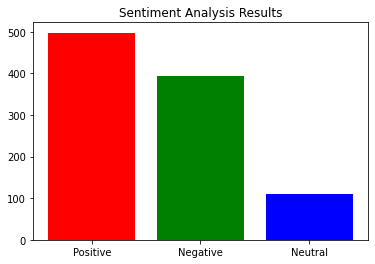

In [24]:
import matplotlib.pyplot as plt

# Create a list of labels for the x-axis
labels = vader_counts.index

# Create a list of values for the y-axis
values = vader_counts.values

# Plot the data
# Plot the data
plt.bar(labels, values, color=["red", "green", "blue"])

# Add a title to the plot
plt.title("Sentiment Analysis Results")


# Show the plot
plt.show()

## WordCloud Analytic with wordcloud

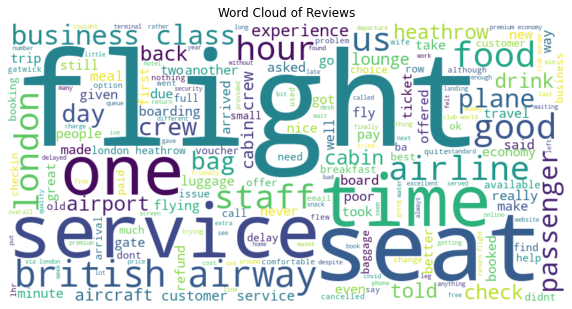

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the cleaned CSV file
df = pd.read_csv("data/cleaned_BA_reviews.csv")

# Concatenate all reviews into a single string
all_reviews = ' '.join(df["reviews"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()